In [ ]:
<a href="https://colab.research.google.com/github/jeffheaton/pretrained-gan-minecraft/blob/main/minecraft-gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/ai-forever/Kandinsky-2.git
!pip install git+https://github.com/openai/CLIP.git
!pip install opencv-python

  Cloning https://github.com/ai-forever/Kandinsky-2.git to c:\users\sasha\appdata\local\temp\pip-req-build-lmm19108
  Resolved https://github.com/ai-forever/Kandinsky-2.git to commit 09bd3e854a5486d4292fc5c0470bf04918055ca2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 73.5/73.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.3/5.3 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 79.5/79.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 827.8/827.8 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 41.6/41.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 117.0/117.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -----------

  Running command git clone --filter=blob:none --quiet https://github.com/ai-forever/Kandinsky-2.git 'C:\Users\sasha\AppData\Local\Temp\pip-req-build-lmm19108'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bertopic 0.13.0 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.


  Cloning https://github.com/openai/CLIP.git to c:\users\sasha\appdata\local\temp\pip-req-build-x4yzsia0
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\sasha\AppData\Local\Temp\pip-req-build-x4yzsia0'


In [11]:
from kandinsky2 import get_kandinsky2

In [12]:
model = get_kandinsky2(
    'cuda', 
    task_type='text2img', 
    cache_dir='/tmp/kandinsky2', 
    model_version='2.1', 
    use_flash_attention=False
)

C:\Users\sasha\AppData\Local\Programs\Python\Python37\lib\site-packages\huggingface_hub\file_download.py:597: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/2.68G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/271M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

100%|███████████████████████████████████████| 890M/890M [03:26<00:00, 4.52MiB/s]


making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.


In [37]:
data_science = model.generate_text2img(
    "data scientist blog 4k",
    num_steps=100,
    batch_size=1,
    guidance_scale=4,
    h=768,
    w=768,
    sampler='p_sampler', 
    prior_cf_scale=4,
    prior_steps="5"
)[0]

  0%|          | 0/100 [00:00<?, ?it/s]

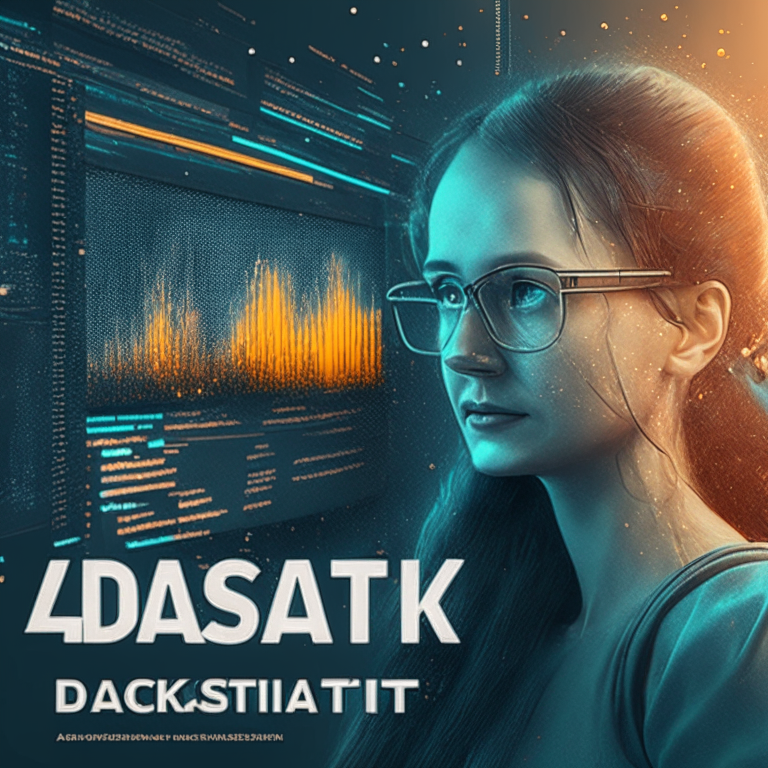

In [38]:
data_science

In [39]:
robots = model.generate_text2img(
    "data scientist in real world 4k",
    num_steps=100,
    batch_size=1,
    guidance_scale=4,
    h=1024,
    w=1024,
    sampler='p_sampler', 
    prior_cf_scale=4,
    prior_steps="5"
)[0]

  0%|          | 0/100 [00:00<?, ?it/s]

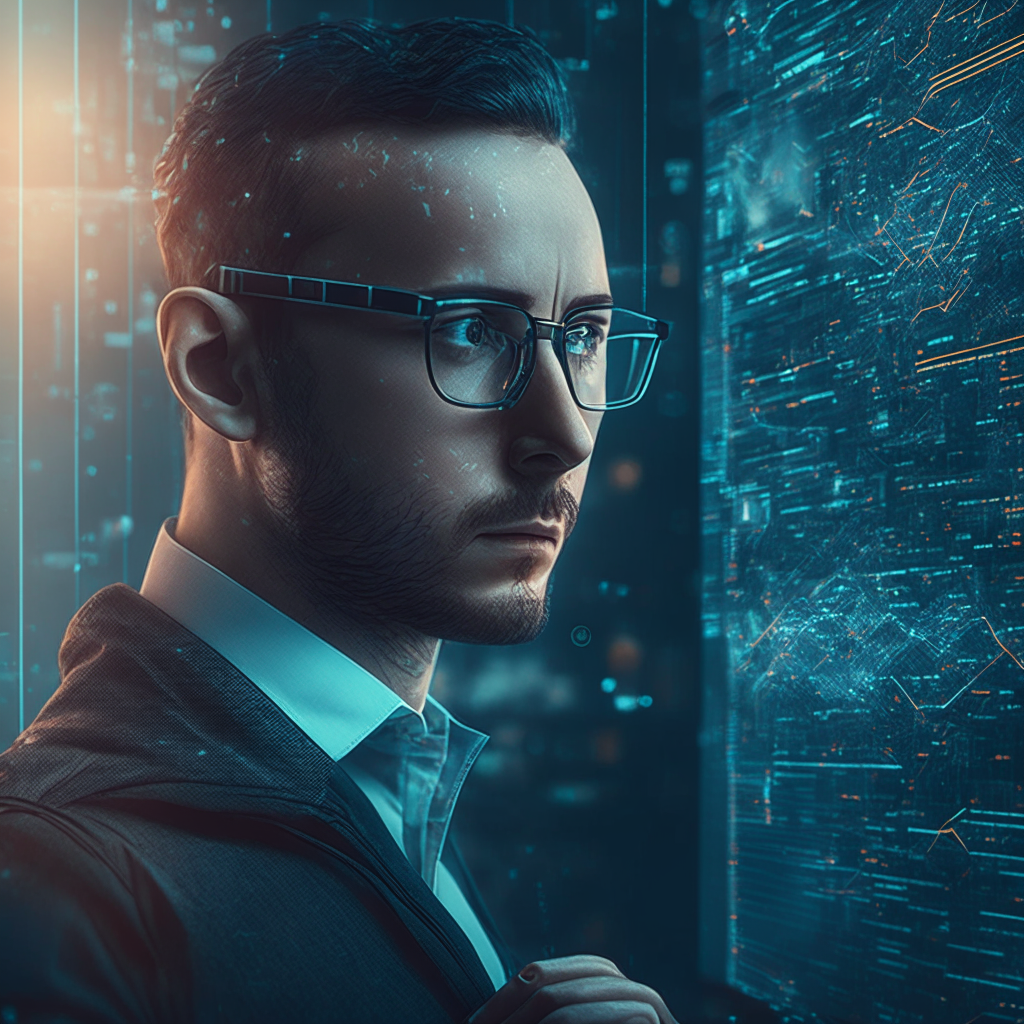

In [40]:
robots

In [41]:
image_mixed = model.mix_images(
    [data_science, robots], [0.5, 0.5], 
    num_steps=100, 
    batch_size=1, 
    guidance_scale=4, 
    h=1024, 
    w=1024, 
    sampler='p_sampler', 
    prior_cf_scale=4, 
    prior_steps="5",
)[0]

  0%|          | 0/100 [00:00<?, ?it/s]

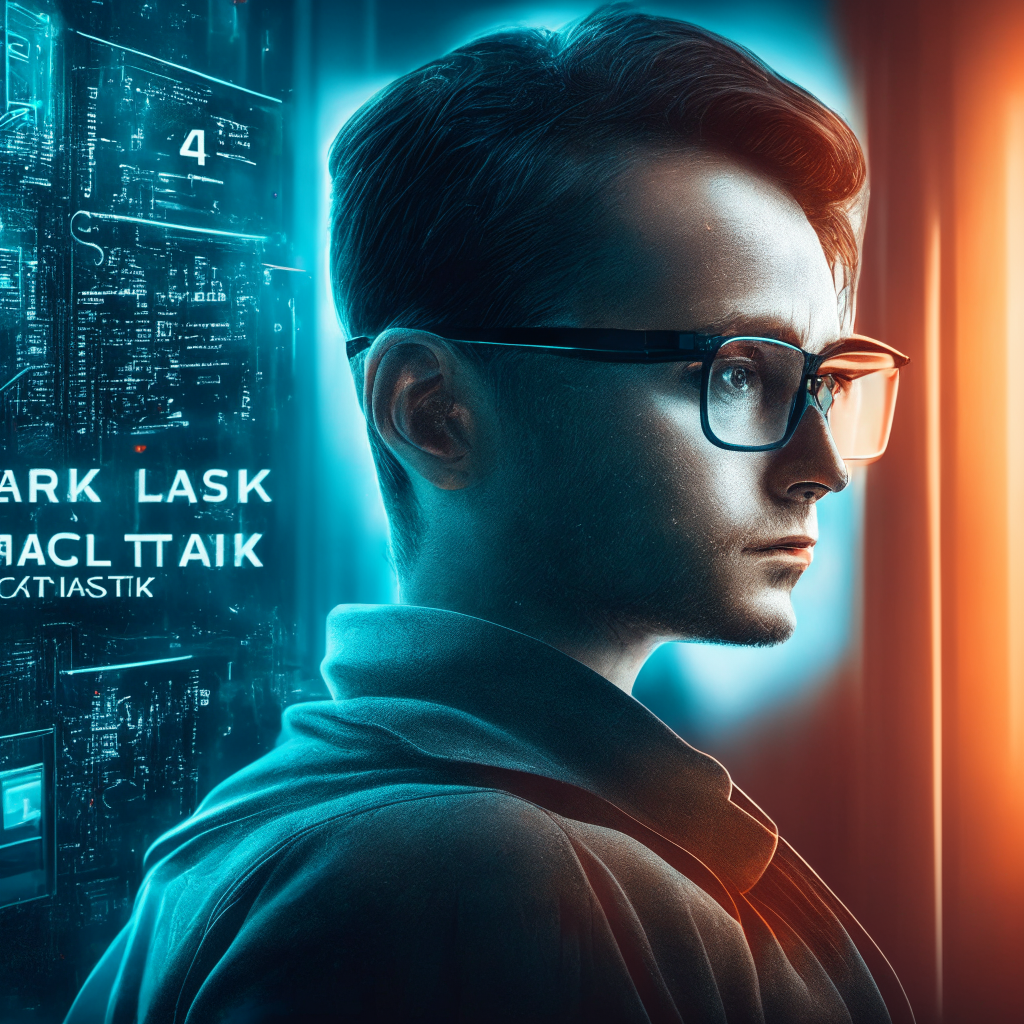

In [42]:
image_mixed